### Import Library and Dataset

In [2]:
!pip install statsmodels

^C


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 5.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 9.9 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.9 MB 8.4 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/9.9 MB 8.4 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.9 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 9.4 MB/s eta 0:00:00


In [ ]:
"""
Created on Tue Oct 26 02:50:39 2021

@author: Aditya agrawal
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
%matplotlib inline 

file_path = '../data/raw/KAG_conversion_data.csv'
sales = pd.read_csv(file_path)
sales.head()


ModuleNotFoundError: No module named 'statsmodels'

Categorical Variables=
1.) age: age of the person to whom the ad is shown.<br>

2.) gender: gender of the person to whim the add is shown<br>

Continuos Variables= 

1.) ad_id: an unique ID for each ad.<br>

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.<br>

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.<br>

4.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).<br>

5.) Impressions: the number of times the ad was shown.<br>

6.) Clicks: number of clicks on for that ad.<br>

7.) Spent: Amount paid by company xyz to Facebook, to show that ad.<br>

8.) Total conversion: Total number of people who enquired about the product after seeing the ad.<br>

9.) Approved conversion: Total number of people who bought the product after seeing the ad.<br>

## Generate basic Summary Statistics

In [2]:
sales.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


#### no null values or bad data present - no preprocessing required

## Check for duplicate values

In [3]:
sales.loc[sales.duplicated()] 

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion


#### no duplicate values

In [4]:
sales.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

#### only 3 unique ad campaign seems to be present here

## Exploratory data analysis

### Which variables are co-related ? -  Further EDA will be based on it

In [5]:
sales.corr()#correlation coefficent

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


#### Inference - 
notice some very interesting results here like - ad_id	, xyz_campaign_id,	fb_campaign_id seem to be very highly correlated (should be intutive why) - almost multi-colinear hence don't use all three in prediction <br>
Also Click and Spent seem to be multi-colinear too (corr - 0.992906)- they both provide similar information.
and many more


## Visualisation of variables

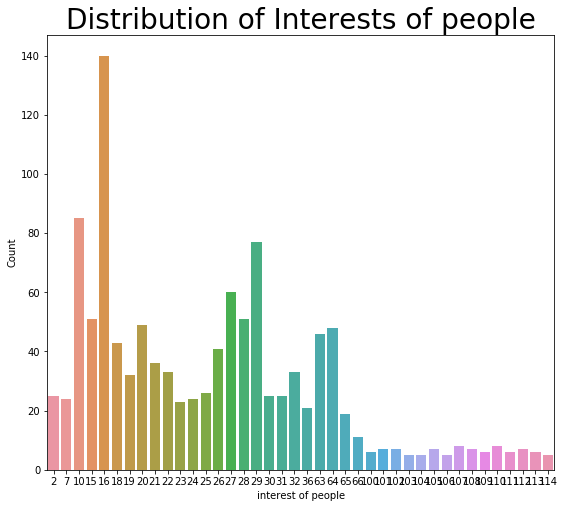

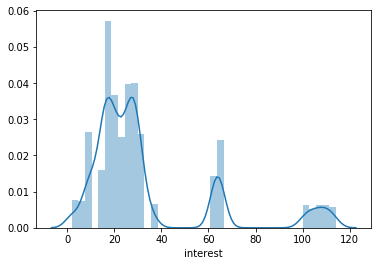

In [6]:
#plot of interest
#most of the people seem to be interested in 16

plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.countplot(sales.interest)
plt.title('Distribution of Interests of people' , size = 28)
plt.xlabel('interest of people')
plt.ylabel('Count')
plt.show()

sns.distplot(sales.interest)
plt.show()

#### inference - 
there seems to be some specific interests that are common between people, with code - 16 being the most common<br>

### Plots of Categorical Variables

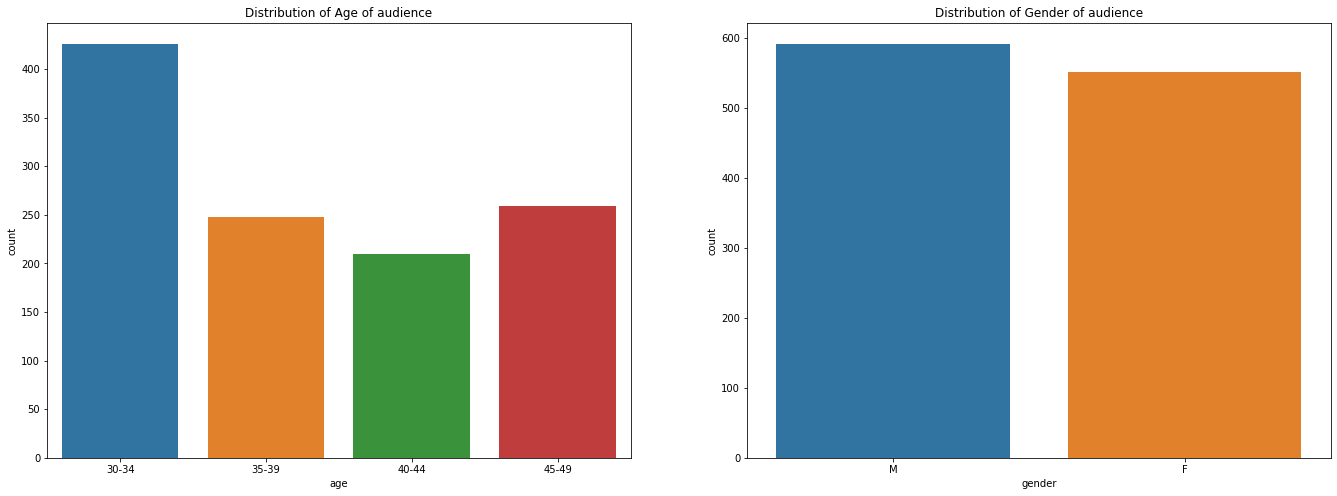

In [7]:
#most of the people in 30-34 range
plt.figure(figsize = (23,8))

plt.subplot(1,2,1)
plt.title('Distribution of Age of audience')
sns.countplot(sales.age)

plt.subplot(1,2,2)
plt.title('Distribution of Gender of audience')
sns.countplot(sales.gender)
plt.show()

### inference-
Most of the people in 30-34 age range<br>
Both Classes of males and females are well- balanced in data set

C:\Users\Aditya agrawal\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


<Figure size 1440x576 with 0 Axes>

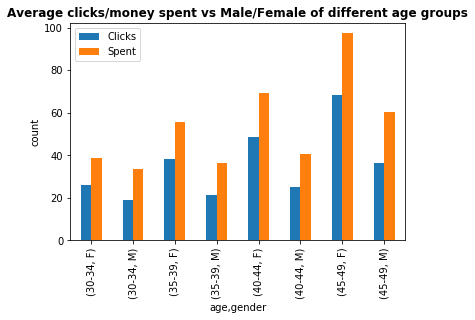

In [8]:
#females spent a lot more than males in all age group

plt.figure(figsize = (20,8))

sales.groupby(['age', 'gender'])['Clicks','Spent'].mean().plot.bar()
plt.title('Average clicks/money spent vs Male/Female of different age groups', fontweight="bold")
plt.ylabel('count')

plt.show()

### Inference - 
from the plot of average click and average money spent by both gender of different ages reveal - females spend much more than males(highest of age range 45-49) and also click on the ads more often <br>
seems like females could be target audience in terms of more effective reach for organisations

### Analysing in terms of Age

In [9]:
df = sales.groupby('age').sum().drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id'], axis = 1)
df.reset_index(inplace = True)
df

,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,30-34,13130,67993019,9483,15252.399986,1431,494
1,35-39,8400,42104644,7094,11112.429994,626,207
2,40-44,7230,39604307,7736,11589.729981,523,170
3,45-49,8692,63732858,13852,20750.669997,684,208


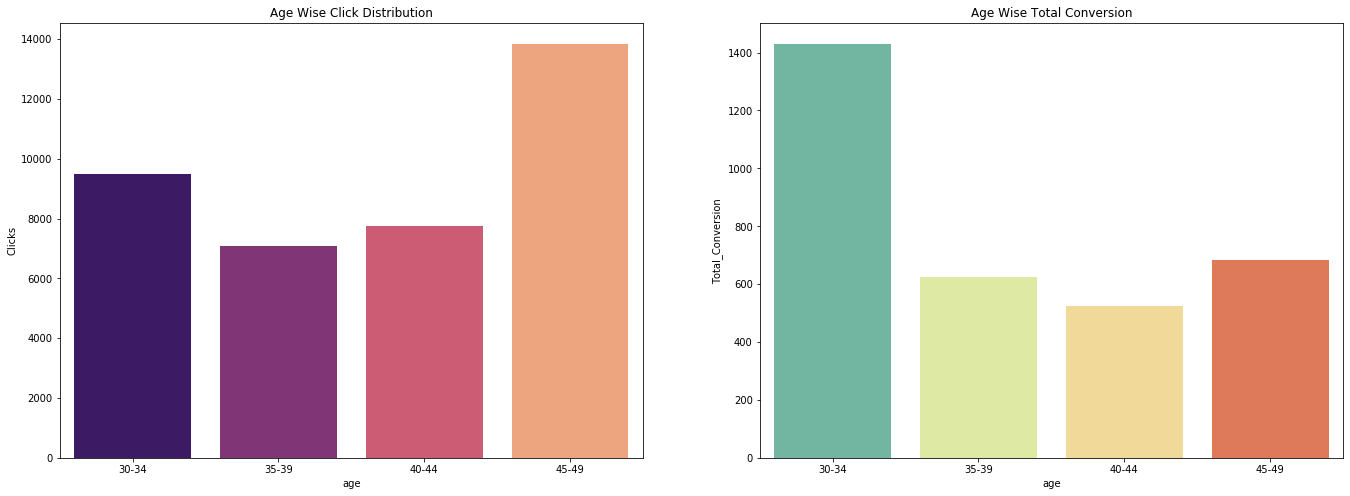

In [10]:
plt.figure(figsize = (23,8))

plt.subplot(1,2,1)
plt.title('Age Wise Click Distribution')
sns.barplot(data = df, x = 'age', y = 'Clicks', palette='magma')

plt.subplot(1,2,2)
plt.title('Age Wise Total Conversion')
sns.barplot(data = df, x = 'age', y = 'Total_Conversion', palette='Spectral_r')

plt.show()

#### Inference - 
People of age group 45-49 click the most on ads shown.<br>
however, audience of age 30-34 have highest conversion rate, so is 45-49 more mature in average because they click but don't buy too often??(umm ofc!!)

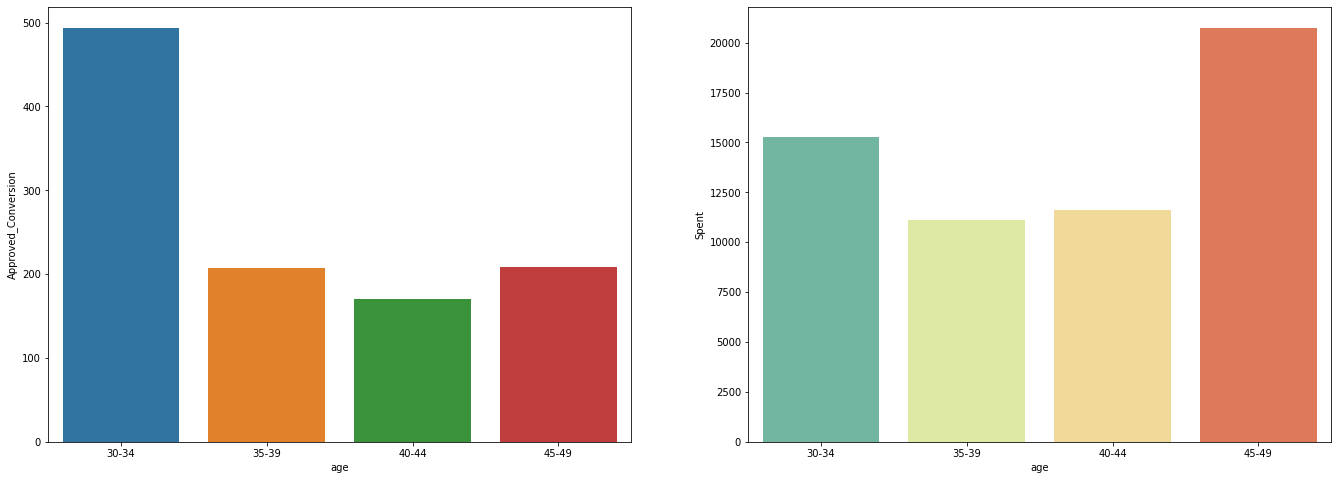

In [11]:
plt.figure(figsize = (23,8))

plt.subplot(1,2,1)
sns.barplot(data = df, x = 'age', y = 'Approved_Conversion')

plt.subplot(1,2,2)
sns.barplot(data = df, x = 'age', y = 'Spent', palette='Spectral_r')

plt.show()

#### inference - 
Implies as above 30-34 have the highest approval rate - should be target audience for maximum success of product for companies<br>
However, Spent vs Age suggest, companies are spending more on ads campaign for age range 45-49- a possibility of optimisation here.(even if they click more!!)

### Analysing Different Ads Campaign - on what factors did success of each campaign depends?

In [12]:
df2 = sales.groupby('xyz_campaign_id').sum().drop(['ad_id', 'fb_campaign_id', 'interest'], axis = 1)
df2.reset_index(inplace = True)
df2

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,916,482925,113,149.710001,58,24
1,936,8128187,1984,2893.369999,537,183
2,1178,204823716,36068,55662.149959,2669,872


In [13]:
df2['Campaign_name'] = ['Campaign A (916)', 'Campaign B (936)', 'Campaign C (1178)']
df2

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Campaign_name
0,916,482925,113,149.710001,58,24,Campaign A (916)
1,936,8128187,1984,2893.369999,537,183,Campaign B (936)
2,1178,204823716,36068,55662.149959,2669,872,Campaign C (1178)


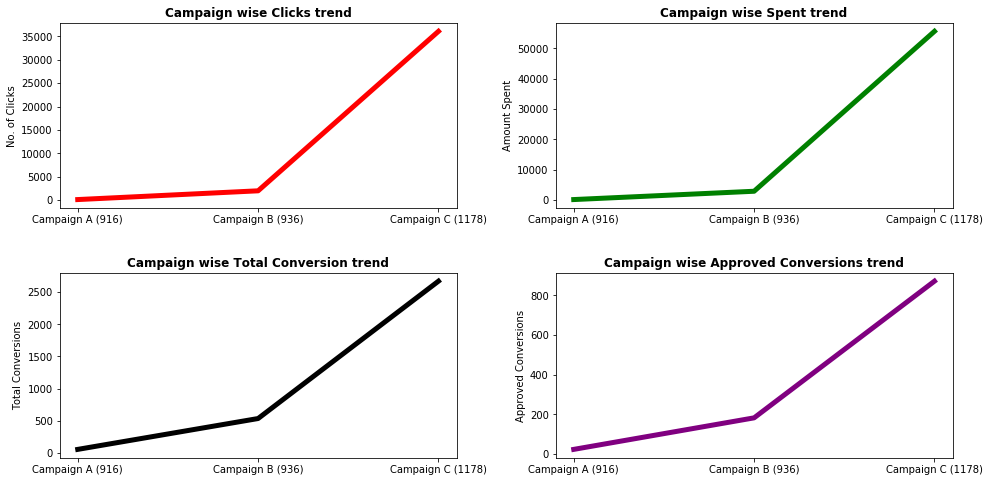

In [14]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,8))


axes[0][0].plot(df2['Campaign_name'], df2['Clicks'], 
                color = 'Red', lw = 5)
axes[0][0].set_title('Campaign wise Clicks trend', fontweight = 1000)
axes[0][0].set_ylabel('No. of Clicks')


axes[0][1].plot(df2['Campaign_name'], df2['Spent'], 
                color = 'Green', lw = 5)
axes[0][1].set_title('Campaign wise Spent trend', fontweight = 1000)
axes[0][1].set_ylabel('Amount Spent')

axes[1][0].plot(df2['Campaign_name'], df2['Total_Conversion'], 
                color = 'Black', lw = 5)
axes[1][0].set_title('Campaign wise Total Conversion trend', fontweight = 1000)
axes[1][0].set_ylabel("Total Conversions")

axes[1][1].plot(df2['Campaign_name'], df2['Approved_Conversion'],
               color = 'Purple', lw = 5)
axes[1][1].set_title("Campaign wise Approved Conversions trend", fontweight = 1000)
axes[1][1].set_ylabel('Approved Conversions')

fig.subplots_adjust(wspace=0.25, hspace=0.35,)

#### inference- 
Campaign A seems to be least and Campaign C seems to be maximum success.<br>
Clearly, The important factor is the amount of money spent by company and the impressions - so more publicity directly affects total conversion and approved conversion (makes sense intuitively)

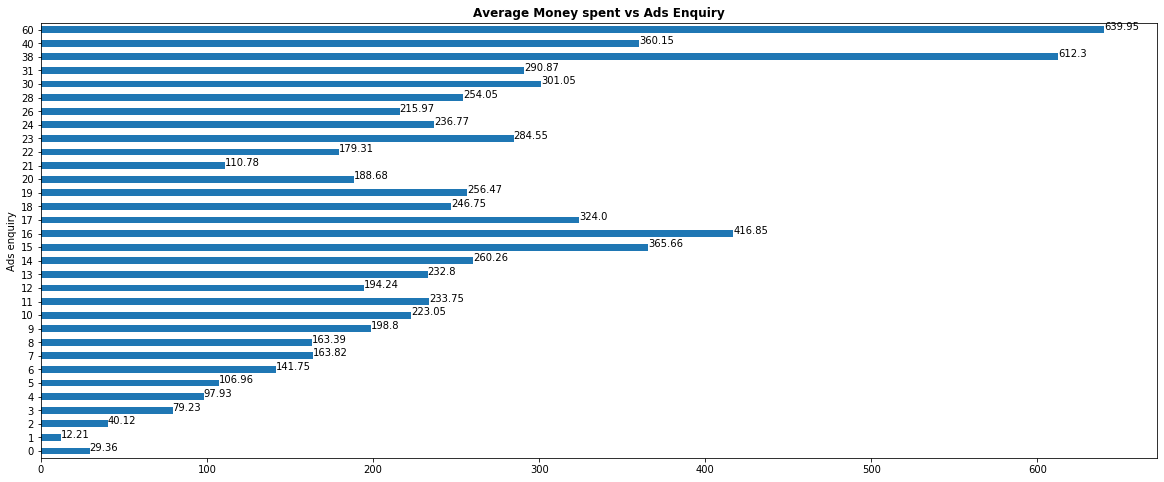

In [15]:
plt.figure(figsize=(20,8))

sales.groupby('Total_Conversion')['Spent'].mean().plot.barh()
plt.title('Average Money spent vs Ads Enquiry', fontweight="bold")
plt.ylabel('Ads enquiry')

abc= round(sales.groupby('Total_Conversion')['Spent'].mean(),2)

#mention the value of mean in plots
for index, value in enumerate(abc):
    plt.text(value, index, str(value))  

#### inference - 
The plot of average ads enquiry or people who enquired about product vs the money spent on the ads by companies reveal that - distribution seems to be skewed towards higher values i.e. more money spent implies more ads enquiry.<br>
also,
When the company spent an average of

1) $10-200 on Ads, then, they got 120 Ads enquiry in return.

2) $200-400 on Ads, then, they got 319 Ads enquiry in return.

3) > $400 on Ads, then, they got 114 Ads enquiry in return.

We can conclude that spending between $200-400 on Ads seems reasonable for any company because it yields the max Ads enquiry.

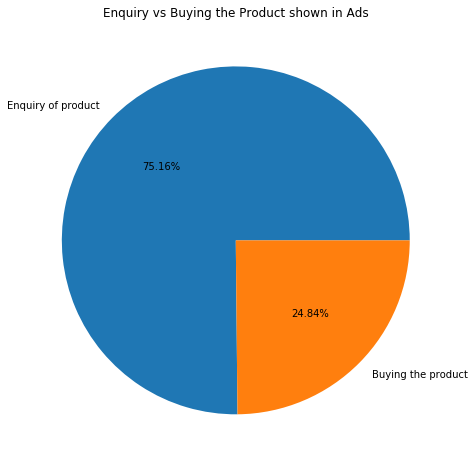

In [16]:
plt.figure(figsize=(20,8))

value=[sales['Total_Conversion'].mean(), sales['Approved_Conversion'].mean()]
labels= ['Enquiry of product', 'Buying the product']
plt.title('Enquiry vs Buying the Product shown in Ads')
plt.pie(value, labels = labels, autopct='%.2f%%')

plt.show()

#### inference - 
About 75% of people only enquired about the product and about 25% actually buyed it - quite typical of the buying habits of people in market

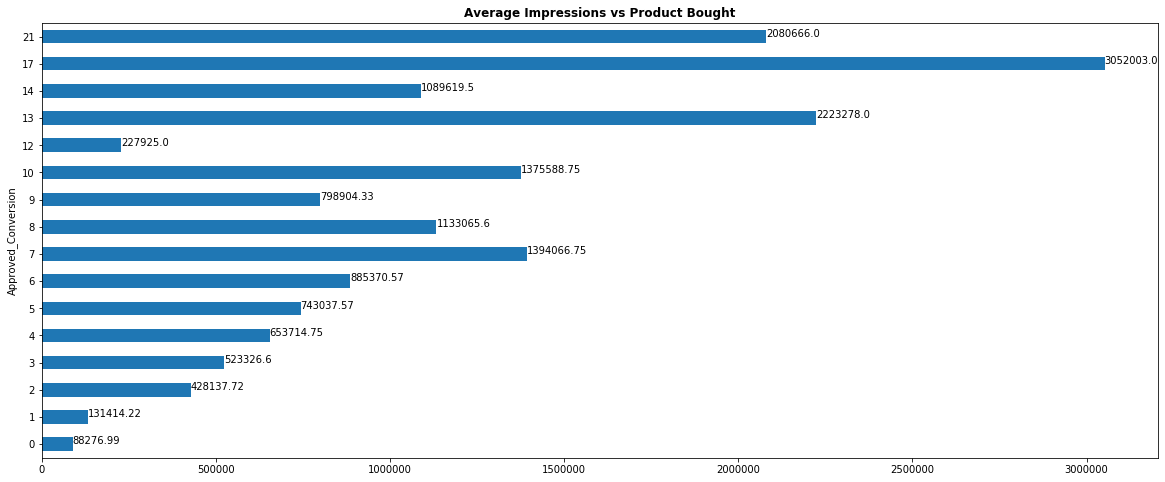

In [17]:
#skewed towards higher values
plt.figure(figsize=(20,8))

sales.groupby(['Approved_Conversion'])['Impressions'].mean().plot.barh()
x = round(sales.groupby(['Approved_Conversion'])['Impressions'].mean(),2)
plt.title('Average Impressions vs Product Bought', fontweight="bold")

#to put the value above the bar
for index, value in enumerate(x):
    plt.text(value, index, str(value))

Clearly,  More impression implies more publicity and thus more people will buy it.

### How does clicks vary with change in number of times the ad is shown?

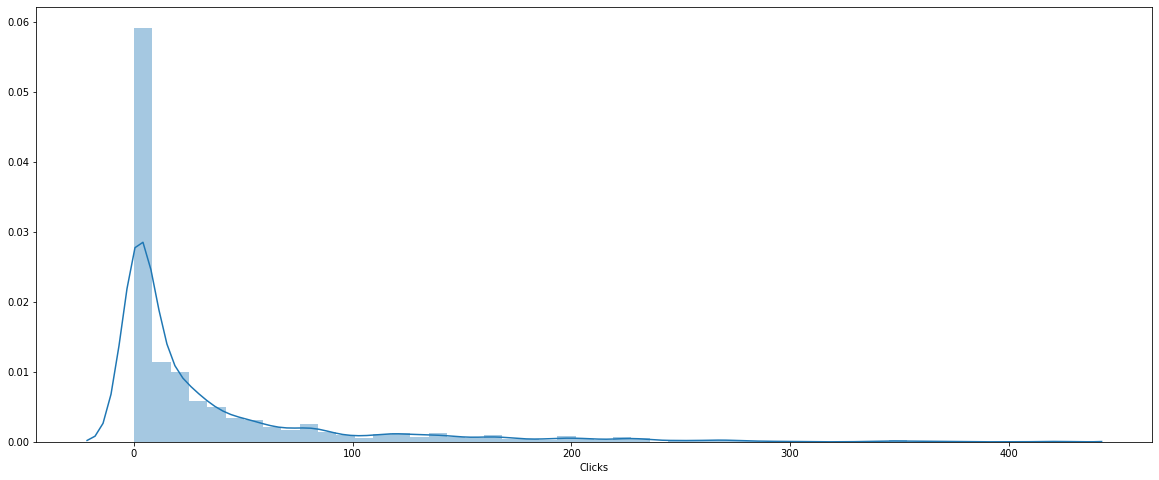

In [18]:
#shows similar distribution to above
#shows nothing interesting
df4 = sales.groupby(['Impressions']).mean()

plt.figure(figsize=(20,8)) 
sns.distplot(df4.Clicks)

plt.show()

### Does Variation with age and gender affects impressions ?

In [19]:
#separate male and female
women= sales[sales['gender']=='F']
men= sales[sales['gender']=='M']

above_average_men = men[men['Impressions'] > sales.Impressions.mean()]
above_average_women = women[women['Impressions'] > sales.Impressions.mean()]

below_average_men = men[men['Impressions'] < sales.Impressions.mean()]
below_average_women = women[women['Impressions'] < sales.Impressions.mean()]

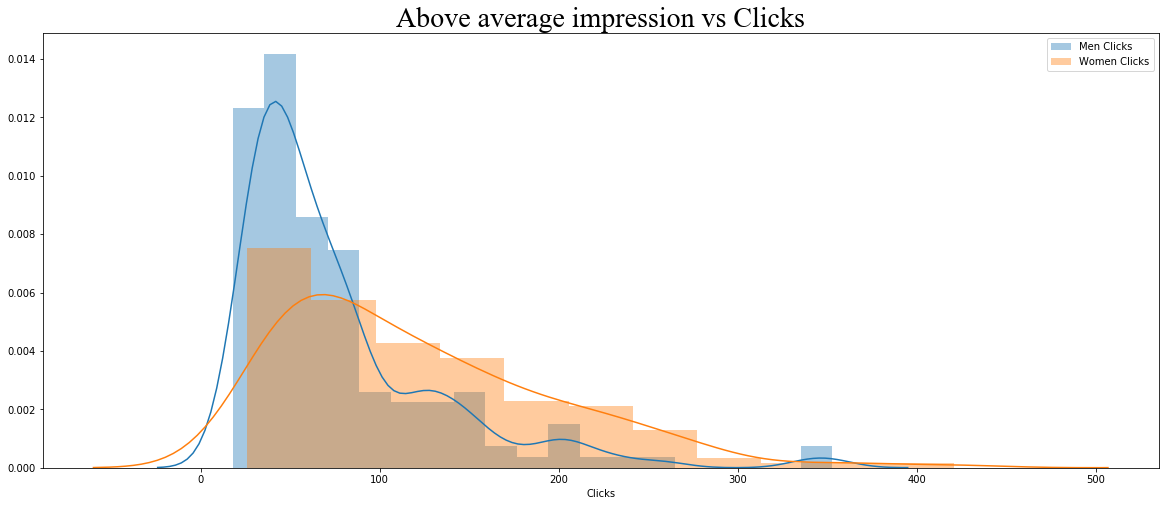

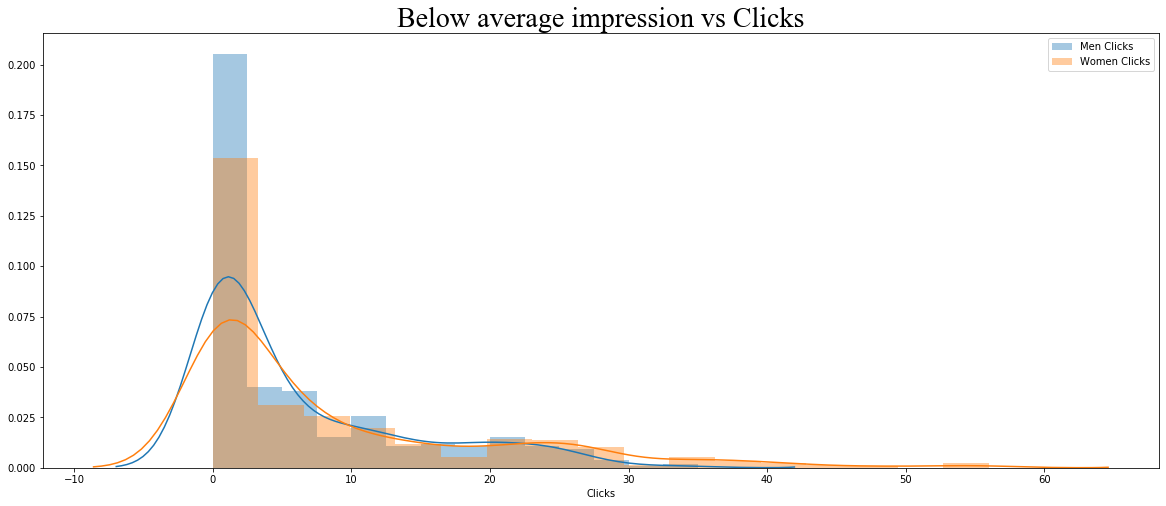

In [20]:
plt.figure(figsize = (20,8))

sns.distplot(above_average_men.Clicks , label = 'Men Clicks')
sns.distplot(above_average_women.Clicks, label = 'Women Clicks')
plt.title('Above average impression vs Clicks', fontweight="bold", fontname="Times New Roman", size=28)
plt.legend()
          
plt.show()

plt.figure(figsize = (20,8))

sns.distplot(below_average_men.Clicks , label = 'Men Clicks')
sns.distplot(below_average_women.Clicks , label = 'Women Clicks')
plt.title('Below average impression vs Clicks', fontweight="bold", fontname="Times New Roman", size=28)
plt.legend()
          
plt.show()

When women were shown ads more than the above average amount, they tend to click on it more often than men, who were shown the same amount of ads.

When women were shown ads less than the above average amount, then number of clicks fell drastically for both men and women, but women still clicked more than men did.

notice peak is shifted in more than average and on same point in below average

### visualising numerical variables

In [21]:
 
data = sales[['interest',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']]
data

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,15,7350,1,1.430000,2,1
1,16,17861,2,1.820000,2,0
2,20,693,0,0.000000,1,0
3,28,4259,1,1.250000,1,0
4,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...
1138,109,1129773,252,358.189997,13,2
1139,110,637549,120,173.880003,3,0
1140,111,151531,28,40.289999,2,0
1141,113,790253,135,198.710000,8,2


<Figure size 1440x576 with 0 Axes>

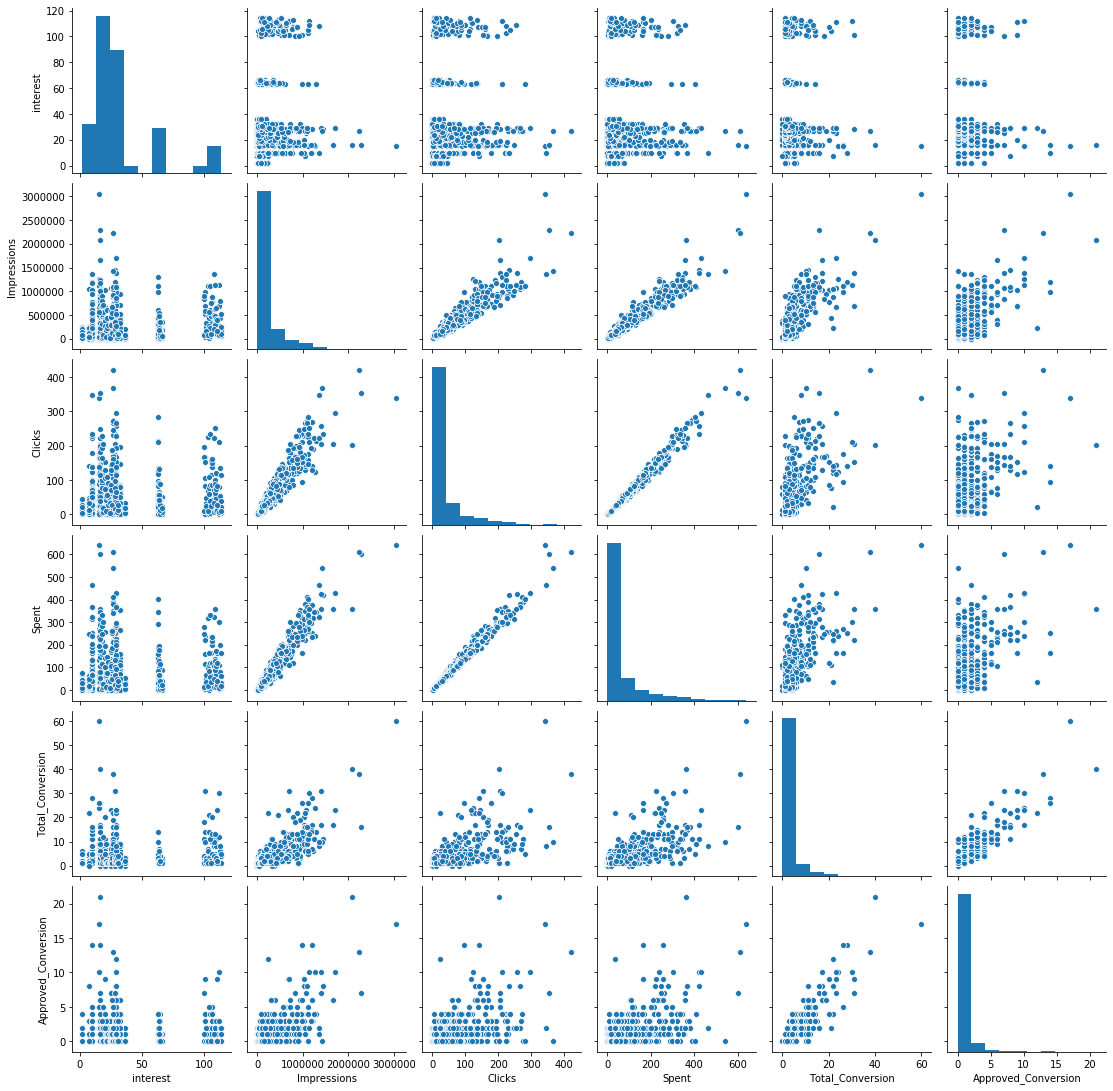

In [22]:
plt.figure(figsize = (20,8))

sns.pairplot(data)

plt.show()

#### inference - if consider total_conversion/approved_conversion as variable of interest 
some variables are vary linearly with dependent variable(linear regression is possible)

however, click and spent is multi-collinear i.e. both provide almost same information

also , other variable look almost like clusters or classification type
and others are randomly scattered

### encode categorical variable for use in model

In [23]:

from sklearn.preprocessing import LabelEncoder

categorical_var = ['gender' , 'age']
data1 = sales.copy()
model = LabelEncoder()

for x in categorical_var:
    data1[x] = model.fit_transform(data1[x])
    print(x, model.classes_)
    
data1

gender ['F' 'M']
age ['30-34' '35-39' '40-44' '45-49']


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,15,7350,1,1.430000,2,1
1,708749,916,103917,0,1,16,17861,2,1.820000,2,0
2,708771,916,103920,0,1,20,693,0,0.000000,1,0
3,708815,916,103928,0,1,28,4259,1,1.250000,1,0
4,708818,916,103928,0,1,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,3,0,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,3,0,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,3,0,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,3,0,113,790253,135,198.710000,8,2


### scale down and normalize data due to high difference in scales of values

In [24]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
dataset_scaled = pd.DataFrame(scale.fit_transform(data1) ,columns = data1.columns)

In [25]:
dataset_scaled

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,-1.436327,-1.245164,-1.457591,-1.071137,0.964750,-0.659472,-0.573793,-0.569573,-0.574772,-0.190922,0.032236
1,-1.436311,-1.245164,-1.457542,-1.071137,0.964750,-0.622353,-0.540171,-0.551988,-0.570282,-0.190922,-0.543486
2,-1.436198,-1.245164,-1.457396,-1.071137,0.964750,-0.473877,-0.595087,-0.587157,-0.591233,-0.414055,-0.543486
3,-1.435971,-1.245164,-1.457005,-1.071137,0.964750,-0.176924,-0.583680,-0.569573,-0.576844,-0.414055,-0.543486
4,-1.435955,-1.245164,-1.457005,-1.071137,0.964750,-0.176924,-0.584083,-0.569573,-0.576383,-0.414055,0.032236
...,...,...,...,...,...,...,...,...,...,...,...
1138,1.687135,0.909863,2.254270,1.470682,-1.036538,2.829719,3.016521,3.844193,3.532036,2.263541,0.607959
1139,1.687140,0.909863,2.254319,1.470682,-1.036538,2.866838,1.442036,1.523009,1.410369,0.032211,-0.543486
1140,1.687145,0.909863,2.254368,1.470682,-1.036538,2.903957,-0.112598,-0.094785,-0.127439,-0.190922,-0.543486
1141,1.687156,0.909863,2.254465,1.470682,-1.036538,2.978196,1.930492,1.786780,1.696198,1.147876,0.607959


### make heatmap of data - determine significant variables

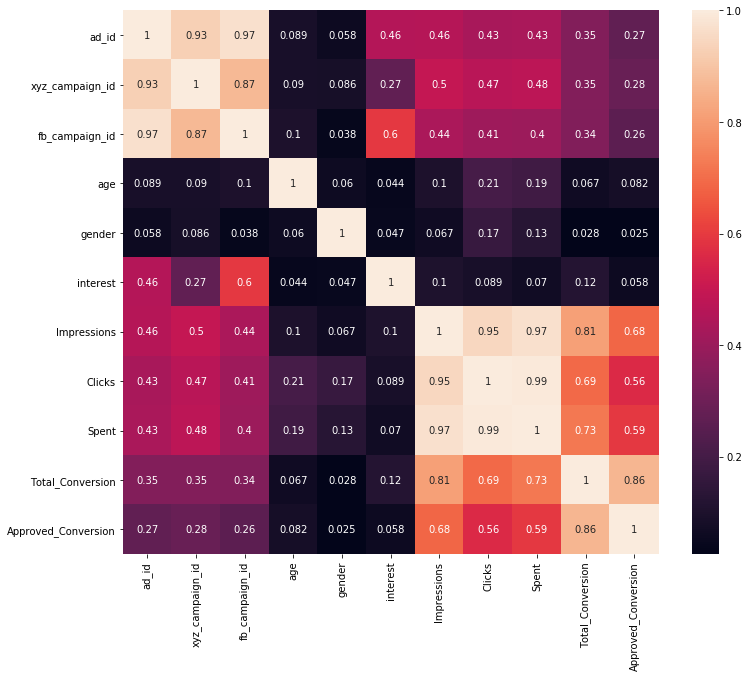

In [26]:
fig= plt.figure(figsize=(12,10))

sns.heatmap(dataset_scaled.corr().abs() , annot= True)

### From EDA and above analysis - 
for dependent variable = total_conversion or approved conversion , I will use signifcant 

independent variables(in my opinion) - impressions , clicks , age , gender , xyz_campaign_id

### Train the model

In [27]:
final_data = dataset_scaled[['Impressions','Clicks','Spent',]]
y = dataset_scaled['Approved_Conversion']

### Use statsmodel api to generate detailed statistics

In [28]:
mtmodel = ols("Approved_Conversion ~ Impressions + Clicks + age + xyz_campaign_id" , data = dataset_scaled).fit()
mtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Approved_Conversion   R-squared:                       0.555
Model:                             OLS   Adj. R-squared:                  0.553
Method:                  Least Squares   F-statistic:                     354.5
Date:                 Tue, 26 Oct 2021   Prob (F-statistic):          3.53e-198
Time:                         15:13:45   Log-Likelihood:                -1159.4
No. Observations:                 1143   AIC:                             2329.
Df Residuals:                     1138   BIC:                             2354.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.648e-17      0.020  -8.33e-16      1.000      -0.039       0.039
Impressions         1.5097      0.067     22.616      0.000       1.379       1.641
Clicks             -0.8284      0.067    -12.414      0.000      -0.959      -0.697
age                -0.0577      0.021     -2.712      0.007      -0.099      -0.016
xyz_campaign_id    -0.0685      0.023     -3.004      0.003      -0.113      -0.024
==============================================================================
Omnibus:                      649.420   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11797.623
Skew:                           2.230   Prob(JB):                         0.00
Kurtosis:                      18.094   Cond. No.                         7.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### inference-
model can predict with accuracy of about 55% i.e. it can explain 55% of variance in dependent variable - possiblities for future improvement? maybe use polynomial features or different type of regression

the low p value than threshold <0.05 suggests is within range and null hypotheses can be rejected 

the F-statistics and very low ~10^-197 value of P(F-statistics) suggest that  that all taken variables are statistically significant and results are not by chance

### plotting CCPR plot to evaluate the fit of model (used for multiple regression)

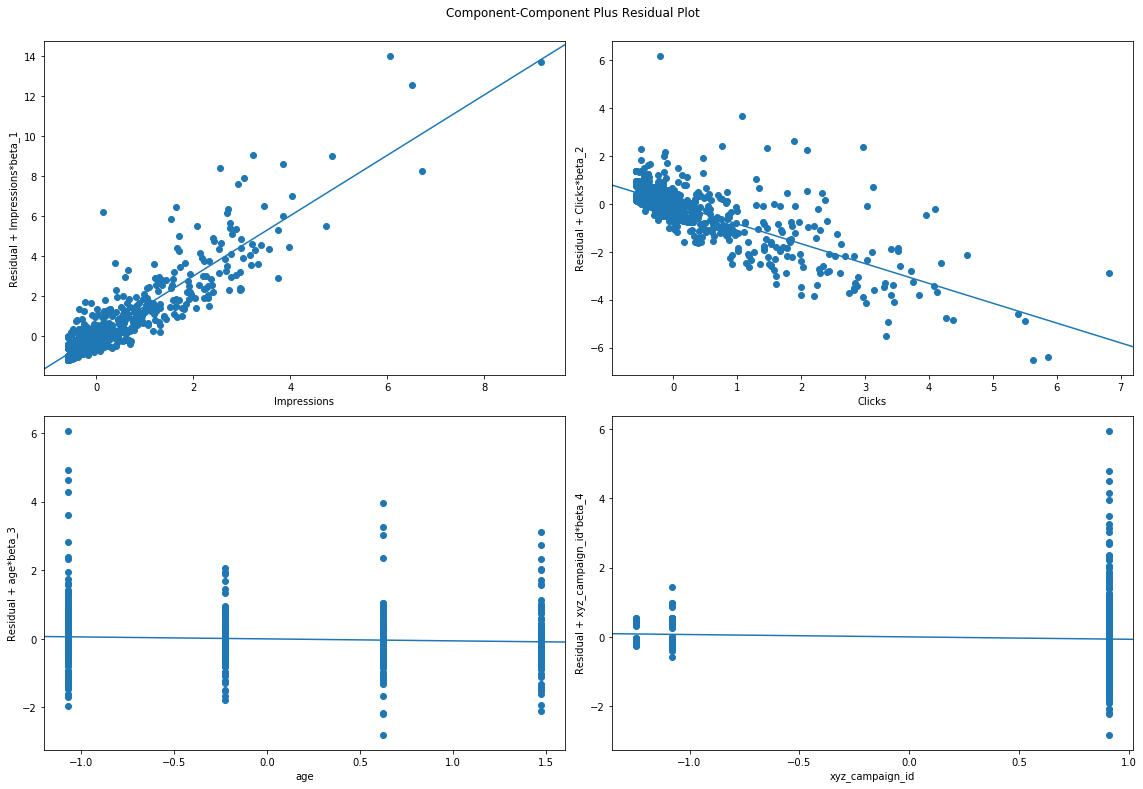

In [29]:
fig = plt.figure(figsize=(16, 16))
sm.graphics.plot_ccpr_grid(mtmodel, fig=fig)
plt.show()

### inference - 
Linear fit can be justified here , although age and xyz_campaign_id variable seems to be not of much use.

### Using sklearn to train the model and predict on test set

In [30]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train , x_test , y_train ,y_test = train_test_split(final_data ,y,test_size = 0.2)

model = LinearRegression()

model.fit(x_train , y_train)

#check accuracy of model
print("R2 score on train data = " , model.score(x_train , y_train))

R2 score on train data =  0.5880913604090554


### inference - 
using the above features 

a simple multiple linear regressor can explain effectively about 60% of variance in the approved conversion

### predicting on test set 

In [31]:
y_pred = model.predict(x_test)